## Import Necessary Libraries

In [1]:
# Analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Extra
import warnings
warnings.filterwarnings(action = 'ignore')


## Data Loading

In [2]:
df = pd.read_csv(r'C:\Users\Data Science\Office\SQL Cleanup\assign_june_sql.csv')

In [3]:
df.head()

,Job#,Emp ID,Role.1,Tenure Bucket,Task,Login Date PQ,Total_assign,Taken,Total_est,Category,Service Type,Output,CTJobPriority
0,A1-39543,4796,DTP - L1,0-6 Months,Production,6/1/2024,90,91,90,DTP,Org chart,PowerPoint,Normal
1,A1-39480,3365,DTP - L2,>12 Months,Production,6/1/2024,30,26,30,DTP,Formatting,PowerPoint,Normal
2,A1-39447,3365,DTP - L2,>12 Months,Production,6/1/2024,135,132,300,DTP,Creative / VE,PowerPoint,Senior Cohort
3,A1-39555,4827,DTP - L1,0-6 Months,Production,6/1/2024,30,124,90,DTP,Creative / VE,PowerPoint,Normal
4,A1-39473,3378,DTP - L2,>12 Months,Production,6/1/2024,50,53,50,DTP,Creative / VE,PowerPoint,Normal


## Data Information

In [4]:
df.shape

(39848, 13)

In [5]:
df.columns

Index(['Job#', 'Emp ID', 'Role.1', 'Tenure Bucket', 'Task', 'Login Date PQ',
       'Total_assign', 'Taken', 'Total_est', 'Category', 'Service Type',
       'Output', 'CTJobPriority'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39848 entries, 0 to 39847
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Job#           39848 non-null  object
 1   Emp ID         39848 non-null  int64 
 2   Role.1         39831 non-null  object
 3   Tenure Bucket  39831 non-null  object
 4   Task           39848 non-null  object
 5   Login Date PQ  39848 non-null  object
 6   Total_assign   39848 non-null  int64 
 7   Taken          39848 non-null  int64 
 8   Total_est      39848 non-null  int64 
 9   Category       39814 non-null  object
 10  Service Type   39814 non-null  object
 11  Output         39814 non-null  object
 12  CTJobPriority  39816 non-null  object
dtypes: int64(4), object(9)
memory usage: 4.0+ MB


## Missing Value Check

In [7]:
round(100*df.isnull().mean(),2)

Job#             0.00
Emp ID           0.00
Role.1           0.04
Tenure Bucket    0.04
Task             0.00
Login Date PQ    0.00
Total_assign     0.00
Taken            0.00
Total_est        0.00
Category         0.09
Service Type     0.09
Output           0.09
CTJobPriority    0.08
dtype: float64

###### There is no column with major missing value

In [8]:
### Checking Currenct efficiency

In [12]:
df0 = sum(df['Total_assign'])/sum(df['Taken'])*100
df0

81.59960731366509

## Univariate Analysis

In [13]:
df.columns

Index(['Job#', 'Emp ID', 'Role.1', 'Tenure Bucket', 'Task', 'Login Date PQ',
       'Total_assign', 'Taken', 'Total_est', 'Category', 'Service Type',
       'Output', 'CTJobPriority'],
      dtype='object')

In [14]:
# Calculating the efficiency of an operator on a perticular job

df['Efficiency'] = round((df['Total_assign']/df['Taken'])*100,0)

In [15]:
df['Efficiency'].head()

0     99.0
1    115.0
2    102.0
3     24.0
4     94.0
Name: Efficiency, dtype: float64

### Checking outlier of Efficiency

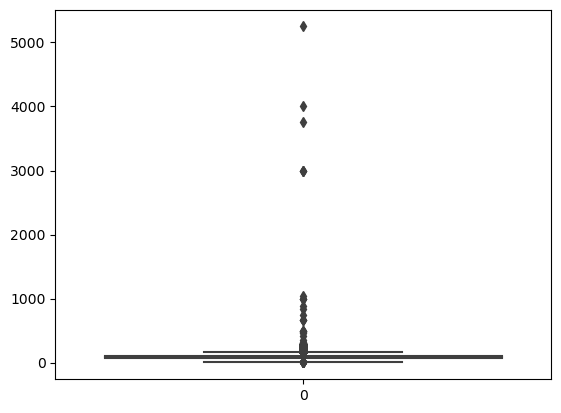

In [16]:
sns.boxplot(df['Efficiency'])
plt.show()

In [17]:
df.shape

(39848, 14)

In [18]:
count =(df['Efficiency'] < 300).value_counts()
print(count)

Efficiency
True     39822
False       26
Name: count, dtype: int64


In [19]:
# Efficiency should no be grater then 300, drop the entries where efficency is grater then 300

df = df[df['Efficiency'] < 300]

In [20]:
df.shape

(39822, 14)

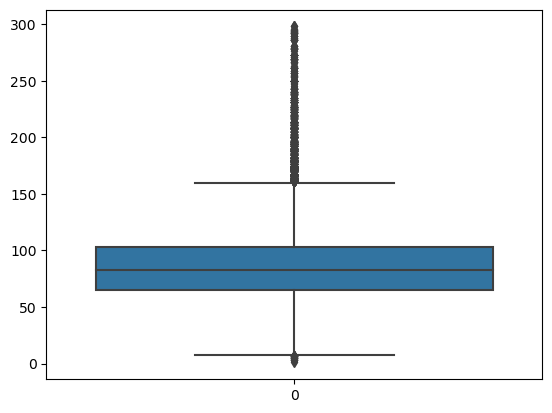

In [21]:
# Checking outlier of efficinecy again

sns.boxplot(df['Efficiency'])
plt.show()

## Making Buckets

In [22]:
# Efficiency Bucket

df['Eff_bucket'] = df['Efficiency'].apply(lambda Eff: 
                                   '0 - 50' if Eff < 50
                                   else '50 - 100' if Eff < 100
                                   else '100 - 150' if 100 <= Eff < 150
                                   else '150 - 200' if 150 <= Eff < 200 
                                   else '200 - 250' if 200 <= Eff < 250
                                   else '250 - 300' if 250 <= Eff < 300
                                   else 'More then 300'

)

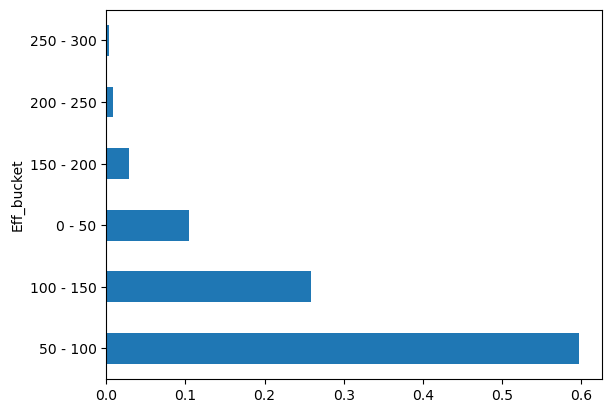

In [23]:
df.Eff_bucket.value_counts(normalize = True).plot.barh()
plt.show()

- There are 2/3 of Employees who are less Efficient

- Lets find the pattern and reason for Inefficiency

- lets check how much they are blowing the Estimation

In [24]:
## Exceeding the Estimation

df['Est_Exceed'] = df['Taken'] - df['Total_est']

df['Est_Exceed'] = df['Est_Exceed'].apply(lambda x: 0 if x <=0 
                                          else x)

In [25]:
df['Exceed'] = df['Est_Exceed'].apply(lambda x : 'Yes' if x > 0
                                      else 'No'
)

In [26]:
df['Exceed'].value_counts(normalize=True)

Exceed
Yes    0.567199
No     0.432801
Name: proportion, dtype: float64

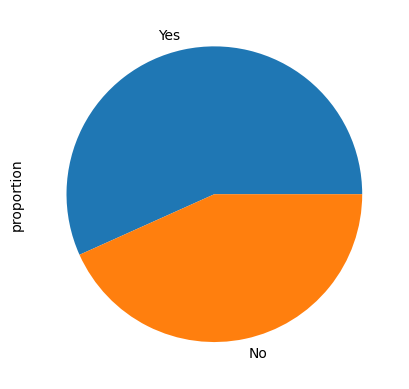

In [27]:
df.Exceed.value_counts(normalize=True).plot.pie()
plt.show()

In [28]:
df['Est_Bucket'] = pd.cut(df.Total_est,[0,60,120,180,240,300,360,420,480,540,9999],labels=['1hr','2hrs','3hrs','4hrs','5hrs','6hrs','7hrs','8hrs','9hrs','More then 9hrs'])

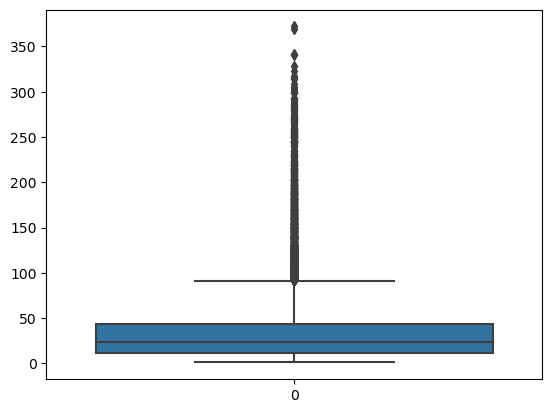

In [29]:
df1 = df[df['Exceed'] == 'Yes']


sns.boxplot(df1['Est_Exceed'])
plt.show()


In [30]:
df1['Est_Exceed_Bucket'] = pd.cut(df1.Est_Exceed,[0,10,20,30,40,50,60,90,120,9999],labels=['<10','10-20','20-30','30-40','40-50','50-60','60-90','90-120','>120'])

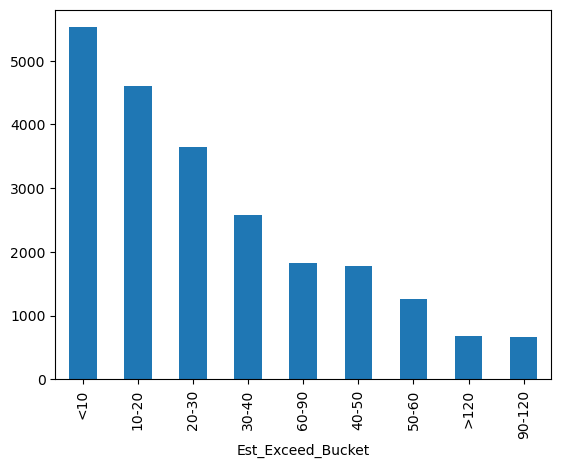

In [31]:
df1.Est_Exceed_Bucket.value_counts().plot.bar()
plt.show()

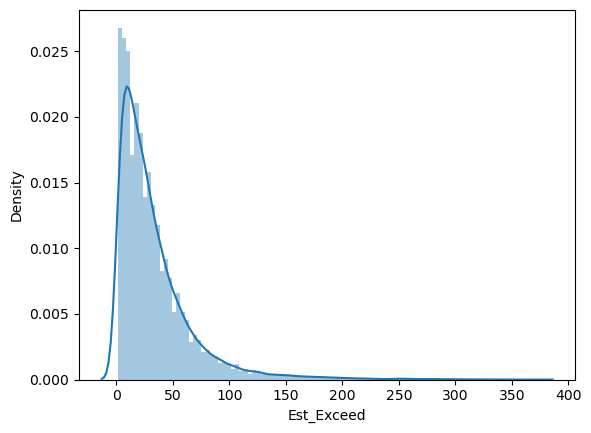

In [32]:
# This is clear that Tracking is exceeding mostly between 1 to 20 mins.

sns.distplot(df1.Est_Exceed, bins=100)
plt.show()

In [33]:
df1.Est_Exceed_Bucket.value_counts(normalize=True)

Est_Exceed_Bucket
<10       0.244610
10-20     0.203878
20-30     0.161686
30-40     0.114402
60-90     0.081153
40-50     0.078806
50-60     0.055961
>120      0.030106
90-120    0.029397
Name: proportion, dtype: float64

In [34]:
Total_Est = df.Est_Bucket.value_counts()
Total_Est_Exceed = df1.Est_Bucket.value_counts()
pd.concat([Total_Est,Total_Est_Exceed], axis = 1)

,count,count
Est_Bucket,,
1hr,15064,11117
2hrs,11638,7640
3hrs,4057,2238
More then 9hrs,2827,4
4hrs,1952,742
5hrs,1345,437
6hrs,1005,246
7hrs,673,122
8hrs,561,29


##### It is observe that ~70% Estimation is exceeding for 1 to 40 mins  on small jobs (Est_bucket 1hr - 2hr)

# Bivariate and Multivariate Analysis

In [35]:
df.columns

Index(['Job#', 'Emp ID', 'Role.1', 'Tenure Bucket', 'Task', 'Login Date PQ',
       'Total_assign', 'Taken', 'Total_est', 'Category', 'Service Type',
       'Output', 'CTJobPriority', 'Efficiency', 'Eff_bucket', 'Est_Exceed',
       'Exceed', 'Est_Bucket'],
      dtype='object')

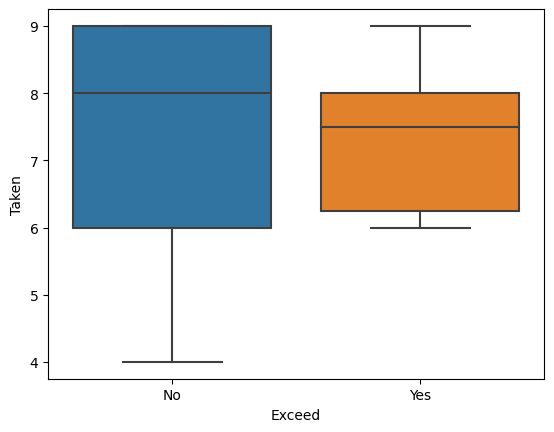

In [36]:
df0 = df[df['Taken'] < 10]

sns.boxplot(data = df0, x='Exceed', y='Taken')
plt.show()

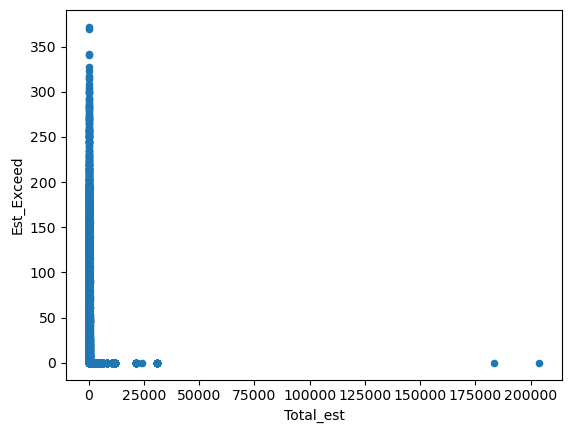

In [37]:
df.plot.scatter(x='Total_est',y='Est_Exceed')
plt.show()

In [38]:
df.Total_est.describe()

count     39822.000000
mean        344.965948
std        2213.419331
min           0.000000
25%          45.000000
50%          90.000000
75%         170.000000
max      204000.000000
Name: Total_est, dtype: float64

In [39]:
df2 = df[(df.Total_est <=360) & (df.Est_Exceed <=100) & (df.Est_Exceed != 0)]
df2.shape

(21383, 18)

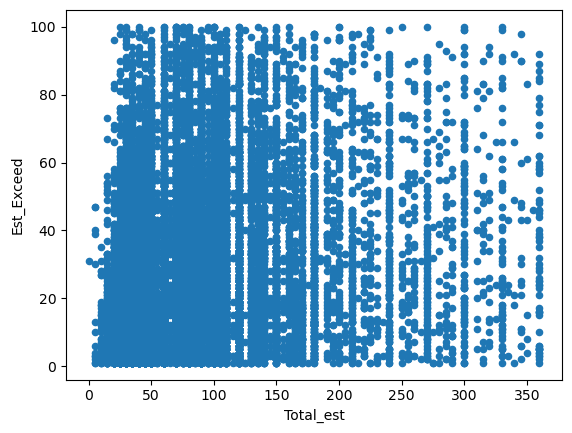

In [40]:
df2.plot.scatter(x='Total_est',y='Est_Exceed')
plt.show()

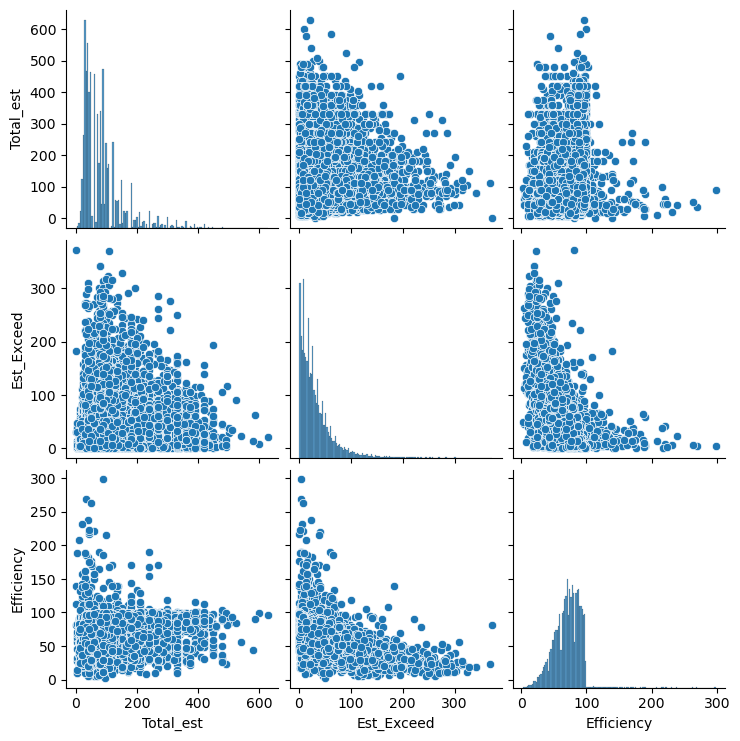

In [41]:
sns.pairplot(data=df1, vars=['Total_est','Est_Exceed','Efficiency'])
plt.show()

In [42]:
Bucket_cols = ['Est_Exceed','Eff_bucket', 'Tenure Bucket', 'Est_Bucket','Est_Exceed_Bucket']

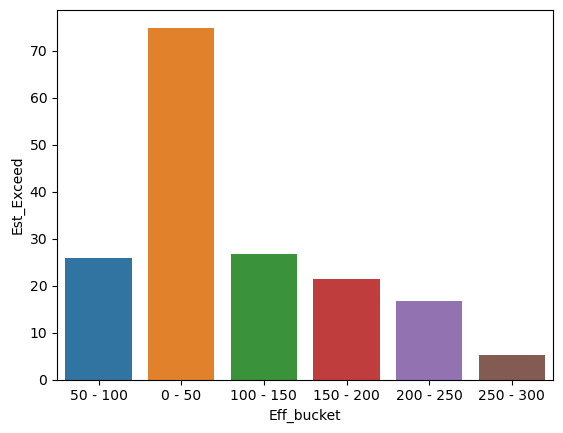

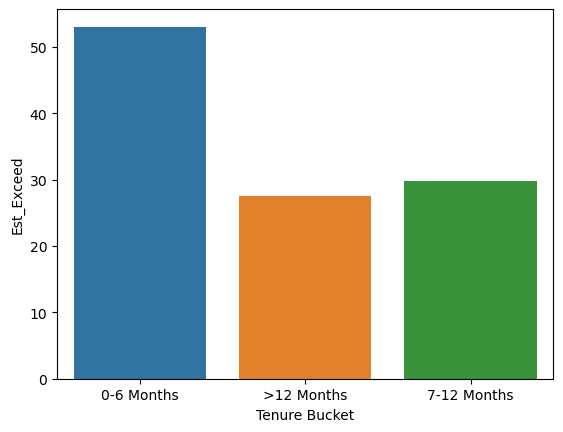

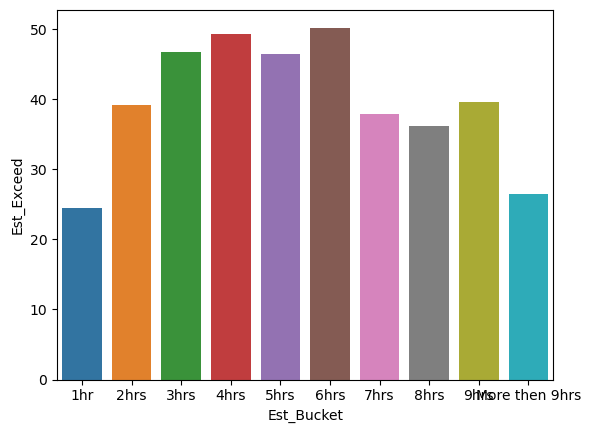

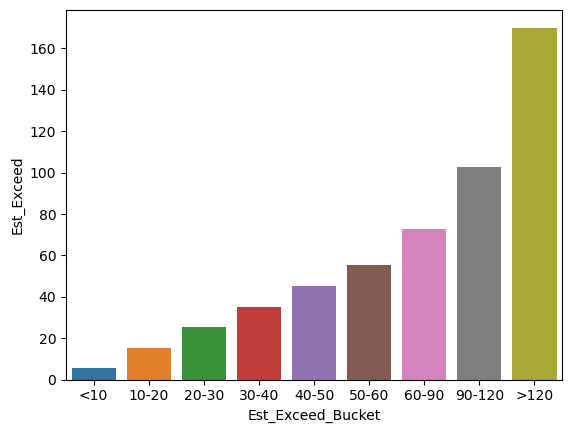

In [43]:
# we use this  code to get all the graphs comparision in one go
for col in Bucket_cols:
    if col!='Est_Exceed':         # we use this to ignore survived v/s survived Comparision 
        sns.barplot(x=df1[col],y=df1['Est_Exceed'],ci=None)
        plt.show()

In [44]:
df.columns

Index(['Job#', 'Emp ID', 'Role.1', 'Tenure Bucket', 'Task', 'Login Date PQ',
       'Total_assign', 'Taken', 'Total_est', 'Category', 'Service Type',
       'Output', 'CTJobPriority', 'Efficiency', 'Eff_bucket', 'Est_Exceed',
       'Exceed', 'Est_Bucket'],
      dtype='object')

In [45]:
df['Est_Exceed'] = df['Est_Exceed']
df['Taken'] = round(df['Taken'],1)

In [46]:
yes_df = df[df['Exceed'] == 'Yes'].groupby(['Est_Bucket'])['Est_Exceed'].agg(Y_count='count',Y_sum='sum',Y_mean='mean')
yes_df = yes_df.round({'Y_sum' : 0 ,'Y_mean' : 0, 'Y_count' : 0})
no_df = df[df['Exceed'] == 'No'].groupby(['Est_Bucket'])['Est_Exceed'].agg(No_count='count')
total_df = df.groupby(['Est_Bucket'])['Taken'].agg(T_count='count',t_sum = 'sum', t_mean = 'mean')
#total_df = df.
Exceed_summary = pd.concat([total_df,yes_df,no_df], axis=1).fillna(0)
print(Exceed_summary)

                T_count    t_sum      t_mean  Y_count   Y_sum  Y_mean  \
Est_Bucket                                                              
1hr               15064   842374   55.919676    11117  272411    25.0   
2hrs              11638  1290633  110.898178     7640  299116    39.0   
3hrs               4057   652900  160.931723     2238  104701    47.0   
4hrs               1952   371695  190.417520      742   36636    49.0   
5hrs               1345   299847  222.934572      437   20270    46.0   
6hrs               1005   241535  240.333333      246   12354    50.0   
7hrs                673   182745  271.537890      122    4617    38.0   
8hrs                561   148264  264.285205       29    1048    36.0   
9hrs                439   120223  273.856492        9     356    40.0   
More then 9hrs     2827   845484  299.074637        4     106    26.0   

                No_count  
Est_Bucket                
1hr                 3947  
2hrs                3998  
3hrs           

#### Conclution - Mostly The tracking is exceding for less the 20 mins on jobs whose estimation is less then 2hrs.
#### Its hapening because there are many check which operator has to follow which is possible to follow on large jobs but not able to follow on small jobs which leads to exceding the estimated time.
#### If on these small jobs we add buffer time of 20mins we can avoid this problem.
